In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import numpy as np

In [2]:
import scanpy as sc

In [3]:
#Read the anndata:
dec_results= "/data/analysis/preeclampsia_2019/placenta_atlas_2022/decidua_anndata/SP014_SP136_decidua_analysis_040322.h5ad"
ldata_dec01= sc.read_h5ad(dec_results)
ldata_dec01

AnnData object with n_obs × n_vars = 66100 × 6000
    obs: 'donor_id', 'time', 'disease', 'tissue', 'smoking', 'cohort', 'library', 'procurement', 'placental_volume', 'gestational_weeks', 'gestational_days', 'maternal_BMI', 'maternal_age', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_MT_genes', 'log1p_total_counts_MT_genes', 'pct_counts_MT_genes', 'total_counts_Ribo_genes', 'log1p_total_counts_Ribo_genes', 'pct_counts_Ribo_genes', 'total_counts_HB_genes', 'log1p_total_counts_HB_genes', 'pct_counts_HB_genes', 'percent_mt2', 'n_counts', 'percent_Ribo2', 'percent_HB2', 'n_genes', 'XIST-counts', 'S_score', 'G2M_score', 'phase', 'celltypist_majority_voting', 'celltypist_predicted_labels', 'donor_id_reordered', 'seed_labels', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'majority_voting', 'predicted_labels', 'conf_score', 'over_clustering', 'leiden', '_scvi_raw_norm_scaling', 'leiden_res1.5', 'leiden_res2', 'dMSC_leiden', 'celltyp

In [4]:
adata_filter= ldata_dec01[ldata_dec01.obs['time'].isin(['late_preterm', 'late_term'])] 
adata_filter.obs['time'].value_counts()

late_preterm    29315
late_term       21203
Name: time, dtype: int64

In [5]:
ldata_norm= adata_filter.raw.to_adata()

sc.pp.normalize_total(ldata_norm, target_sum=1e4)
sc.pp.log1p(ldata_norm)

In [6]:
ldata_norm.obs['condition']= ldata_norm.obs['time'].map(lambda x: {"late_preterm": "PE", "late_term": "Late_term"}.get(x, x)).astype("category")


In [7]:
ldata_norm.obs['celltype_v5'].cat.categories

Index(['DSC1', 'DSC2', 'IL17RA_dMAC3', 'NKT', 'dDC', 'dEVT', 'dEpC', 'dFB1',
       'dFB2', 'dGranul_new', 'dGranulocyte', 'dLEC', 'dLECp', 'dMAC1',
       'dMAC2', 'dMSC', 'dMono_LYZ', 'dNK1', 'dNK2', 'dNK_prol',
       'dPlasma_cell', 'dSMC', 'dTcell', 'dVEC', 'deported_SCT'],
      dtype='object')

In [8]:
ldata_norm.obs['condition']= ldata_norm.obs['condition'].cat.reorder_categories(['Late_term', 'PE'])
ldata_norm.obs['condition'].cat.categories

Index(['Late_term', 'PE'], dtype='object')

In [10]:
sc.settings.set_figure_params(dpi=80)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,4)

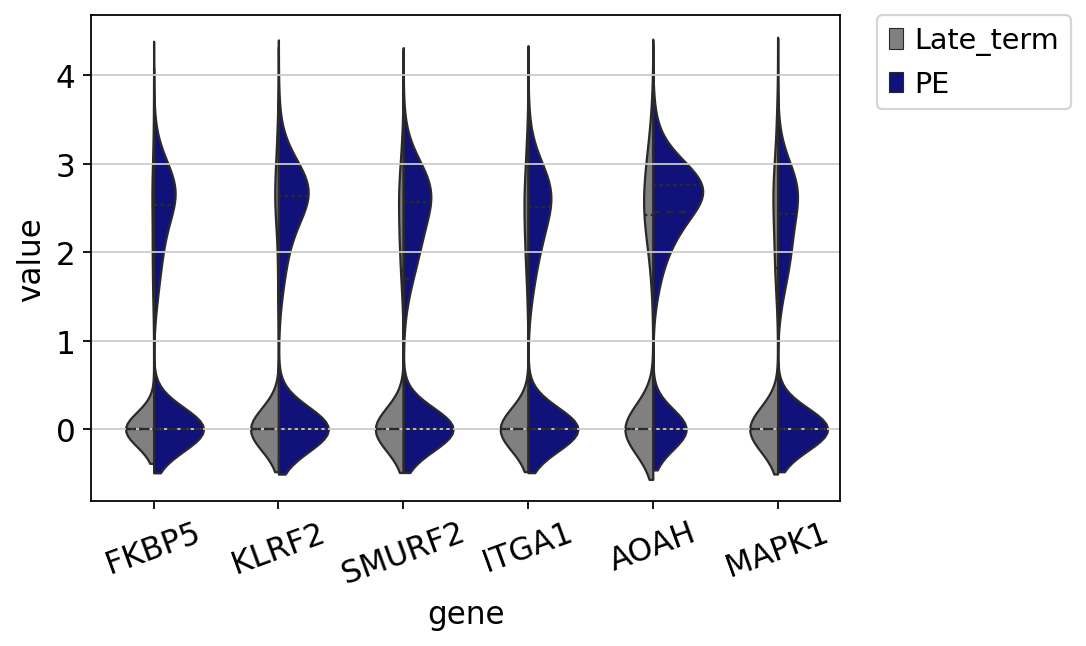

In [11]:
#Subset dNK1
adata_sub= ldata_norm[ldata_norm.obs['celltype_v5']== 'dNK1'] 

adata_sub = adata_sub[adata_sub.obs.condition.isin(['Late_term', 'PE'])].copy()
df = sc.get.obs_df(adata_sub, ['FKBP5', 'KLRF2', 'SMURF2', 'ITGA1', 'AOAH', 'MAPK1', 'condition'])
df = df.set_index('condition').stack().reset_index()
df.columns = ['condition', 'gene', 'value']


sns.violinplot(data=df, x='gene', y='value', hue= "condition",
                split=True, inner="quart", linewidth=1, scale= "count", palette= ['grey', 'darkblue']) 

plt.xticks(rotation=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("dNK1_dysregulated_DEG_150622.pdf")

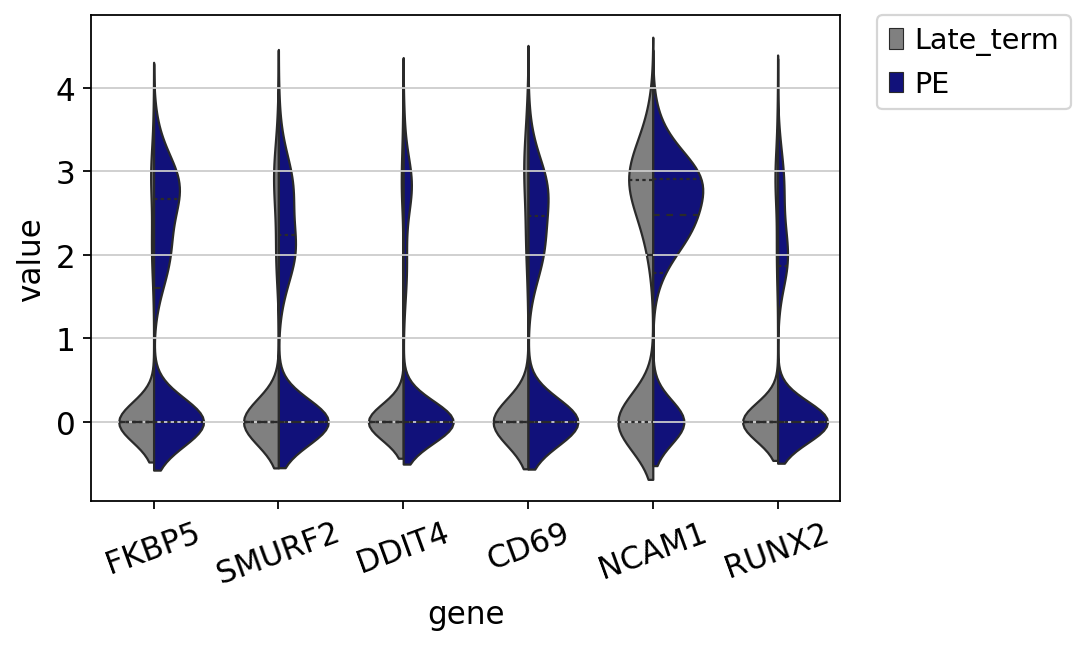

In [13]:
#Subset dNK2
adata_sub= ldata_norm[ldata_norm.obs['celltype_v5']== 'dNK2'] 

adata_sub = adata_sub[adata_sub.obs.condition.isin(['Late_term', 'PE'])].copy()
df = sc.get.obs_df(adata_sub, ['FKBP5', 'SMURF2', 'DDIT4', 'CD69', 'NCAM1', 'RUNX2', 'condition'])
df = df.set_index('condition').stack().reset_index()
df.columns = ['condition', 'gene', 'value']


sns.violinplot(data=df, x='gene', y='value', hue= "condition",
                split=True, inner="quart", linewidth=1, scale= "count", palette= ['grey', 'darkblue']) 

plt.xticks(rotation=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("dNK2_dysregulated_DEG_150622.pdf")

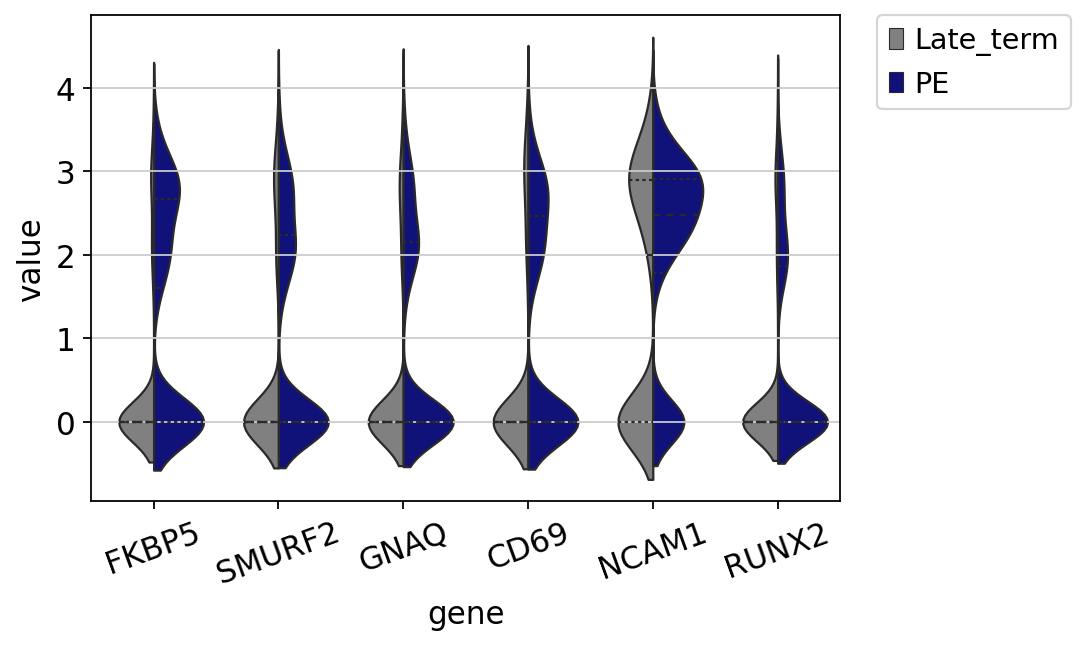

In [14]:
#dNK2: used for manuscript. 
df = sc.get.obs_df(adata_sub, ['FKBP5', 'SMURF2', 'GNAQ', 'CD69', 'NCAM1', 'RUNX2', 'condition'])
df = df.set_index('condition').stack().reset_index()
df.columns = ['condition', 'gene', 'value']


sns.violinplot(data=df, x='gene', y='value', hue= "condition",
                split=True, inner="quart", linewidth=1, scale= "count", palette= ['grey', 'darkblue']) 

plt.xticks(rotation=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("dNK2_dysregulated_DEG_v2_150622.pdf")

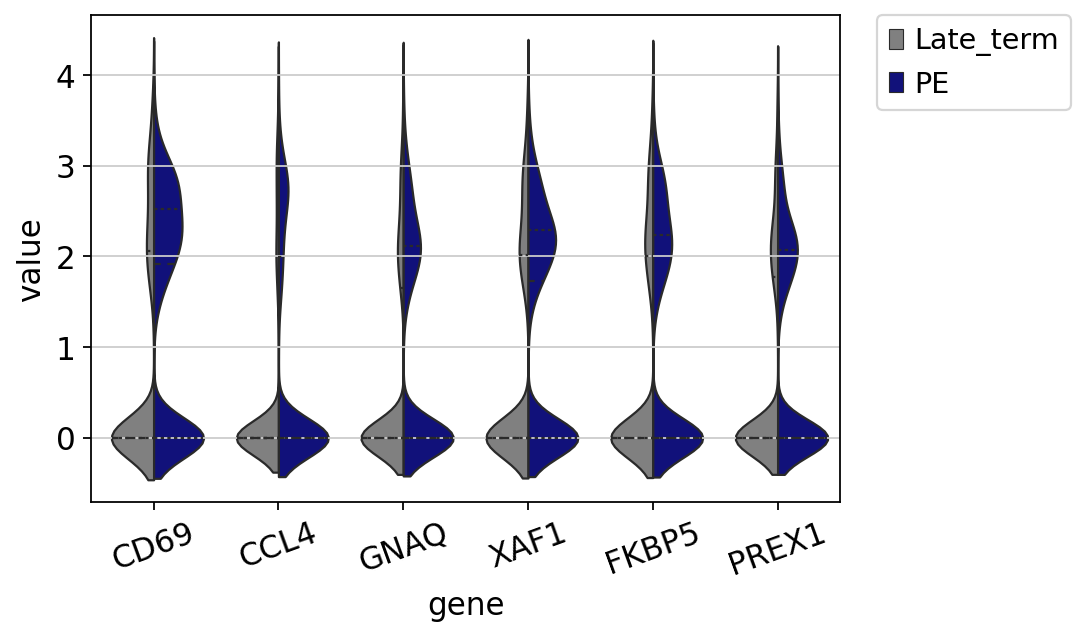

In [17]:
#Subset dTcell
adata_sub= ldata_norm[ldata_norm.obs['celltype_v5']== 'dTcell'] 

adata_sub = adata_sub[adata_sub.obs.condition.isin(['Late_term', 'PE'])].copy()
df = sc.get.obs_df(adata_sub, ['CD69', 'CCL4', 'GNAQ', 'XAF1', 'FKBP5', 'PREX1', 'condition'])
df = df.set_index('condition').stack().reset_index()
df.columns = ['condition', 'gene', 'value']


sns.violinplot(data=df, x='gene', y='value', hue= "condition",
                split=True, inner="quart", linewidth=1, scale= "count", palette= ['grey', 'darkblue']) 

plt.xticks(rotation=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("dTcell_dysregulated_DEG_150622.pdf")

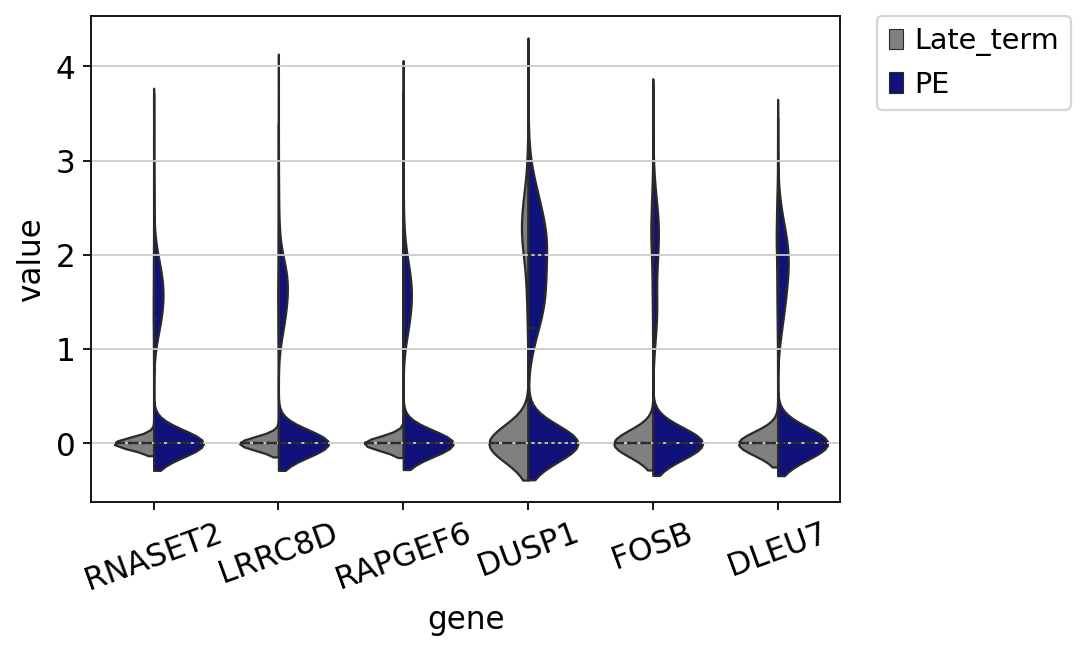

In [18]:
#Subset dMAC1
adata_sub= ldata_norm[ldata_norm.obs['celltype_v5']== 'dMAC1'] 

adata_sub = adata_sub[adata_sub.obs.condition.isin(['Late_term', 'PE'])].copy()
df = sc.get.obs_df(adata_sub, ['RNASET2', 'LRRC8D', 'RAPGEF6', 'DUSP1', 'FOSB', 'DLEU7', 'condition'])
df = df.set_index('condition').stack().reset_index()
df.columns = ['condition', 'gene', 'value']


sns.violinplot(data=df, x='gene', y='value', hue= "condition",
                split=True, inner="quart", linewidth=1, scale= "count", palette= ['grey', 'darkblue']) 

plt.xticks(rotation=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("dMAC1_dysregulated_DEG_150622.pdf")

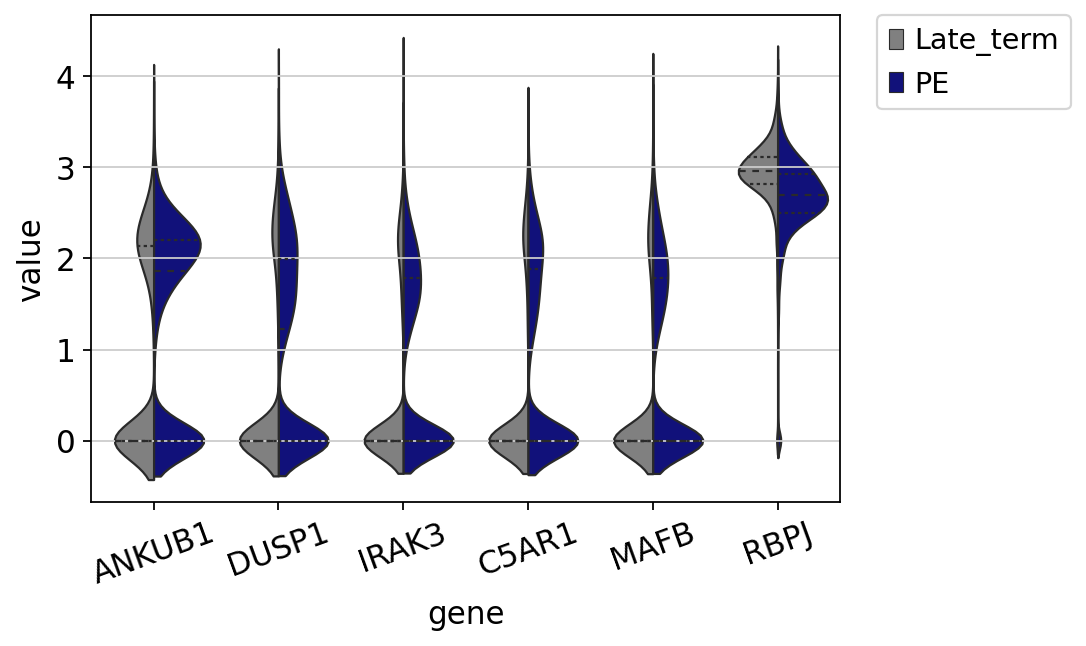

In [20]:
#Subset dMAC1: used for manuscript. 
adata_sub= ldata_norm[ldata_norm.obs['celltype_v5']== 'dMAC1'] 

adata_sub = adata_sub[adata_sub.obs.condition.isin(['Late_term', 'PE'])].copy()
df = sc.get.obs_df(adata_sub, ['ANKUB1', 'DUSP1', 'IRAK3', 'C5AR1', 'MAFB', 'RBPJ', 'condition'])
df = df.set_index('condition').stack().reset_index()
df.columns = ['condition', 'gene', 'value']


sns.violinplot(data=df, x='gene', y='value', hue= "condition",
                split=True, inner="quart", linewidth=1, scale= "count", palette= ['grey', 'darkblue']) 

plt.xticks(rotation=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("dMAC1_dysregulated_v2DEG_150622.pdf")

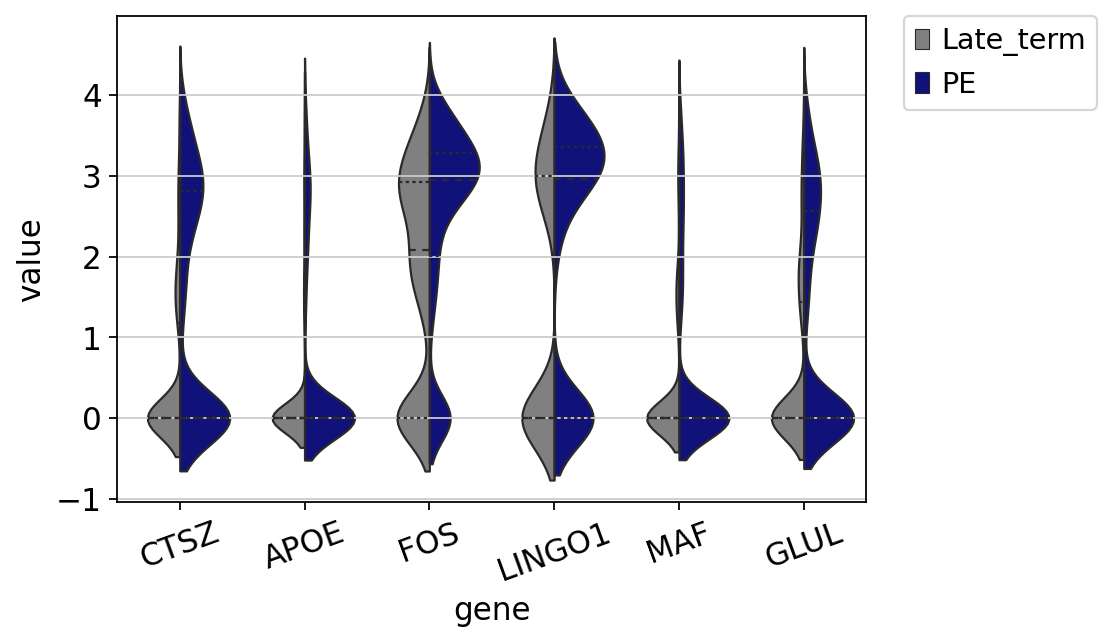

In [22]:
#Subset dMAC2
adata_sub= ldata_norm[ldata_norm.obs['celltype_v5']== 'dMAC2'] 

adata_sub = adata_sub[adata_sub.obs.condition.isin(['Late_term', 'PE'])].copy()
df = sc.get.obs_df(adata_sub, ['CTSZ', 'APOE', 'FOS', 'LINGO1', 'MAF', 'GLUL', 'condition'])
df = df.set_index('condition').stack().reset_index()
df.columns = ['condition', 'gene', 'value']


sns.violinplot(data=df, x='gene', y='value', hue= "condition",
                split=True, inner="quart", linewidth=1, scale= "count", palette= ['grey', 'darkblue']) 

plt.xticks(rotation=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("dMAC2_dysregulated_v1_DEG_150622.pdf")

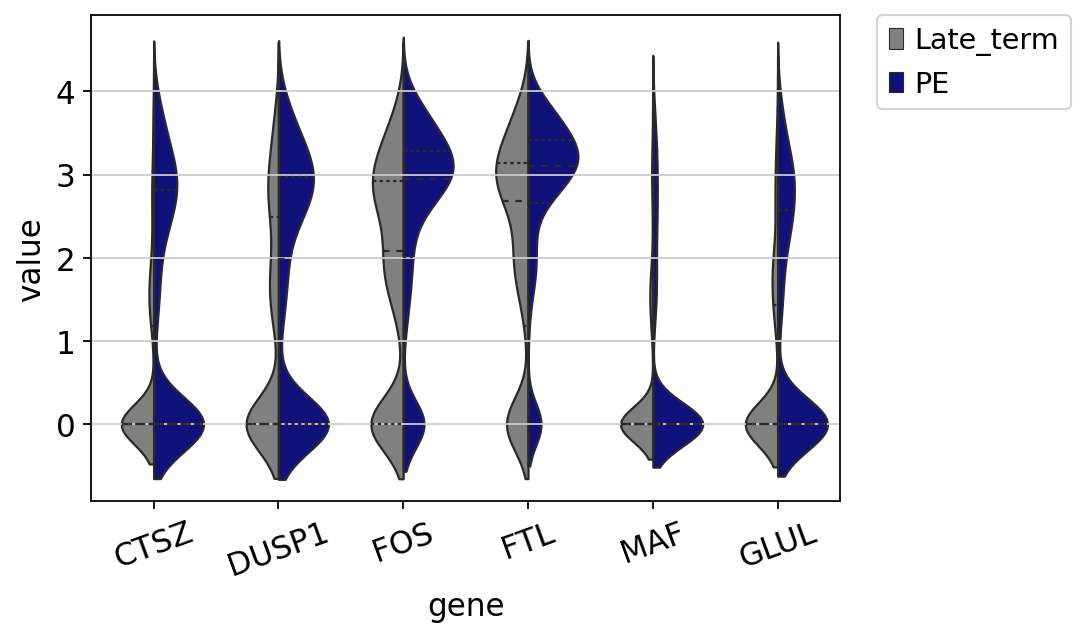

In [25]:
df = sc.get.obs_df(adata_sub, ['CTSZ', 'DUSP1', 'FOS', 'FTL', 'MAF', 'GLUL', 'condition'])
df = df.set_index('condition').stack().reset_index()
df.columns = ['condition', 'gene', 'value']


sns.violinplot(data=df, x='gene', y='value', hue= "condition",
                split=True, inner="quart", linewidth=1, scale= "count", palette= ['grey', 'darkblue']) 

plt.xticks(rotation=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("dMAC2_dysregulated_v2_DEG_150622.pdf")

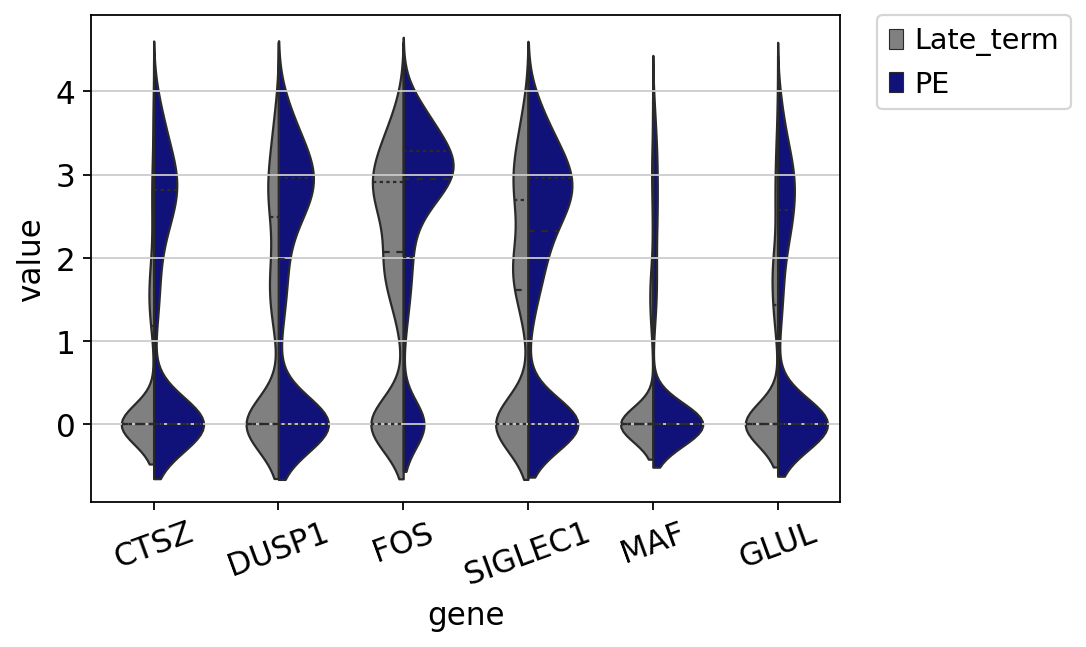

In [26]:
#MAC2: used for manuscript. 
df = sc.get.obs_df(adata_sub, ['CTSZ', 'DUSP1', 'FOS', 'SIGLEC1', 'MAF', 'GLUL', 'condition'])
df = df.set_index('condition').stack().reset_index()
df.columns = ['condition', 'gene', 'value']


sns.violinplot(data=df, x='gene', y='value', hue= "condition",
                split=True, inner="quart", linewidth=1, scale= "count", palette= ['grey', 'darkblue']) 

plt.xticks(rotation=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("dMAC2_dysregulated_v1_DEG_150622.pdf")

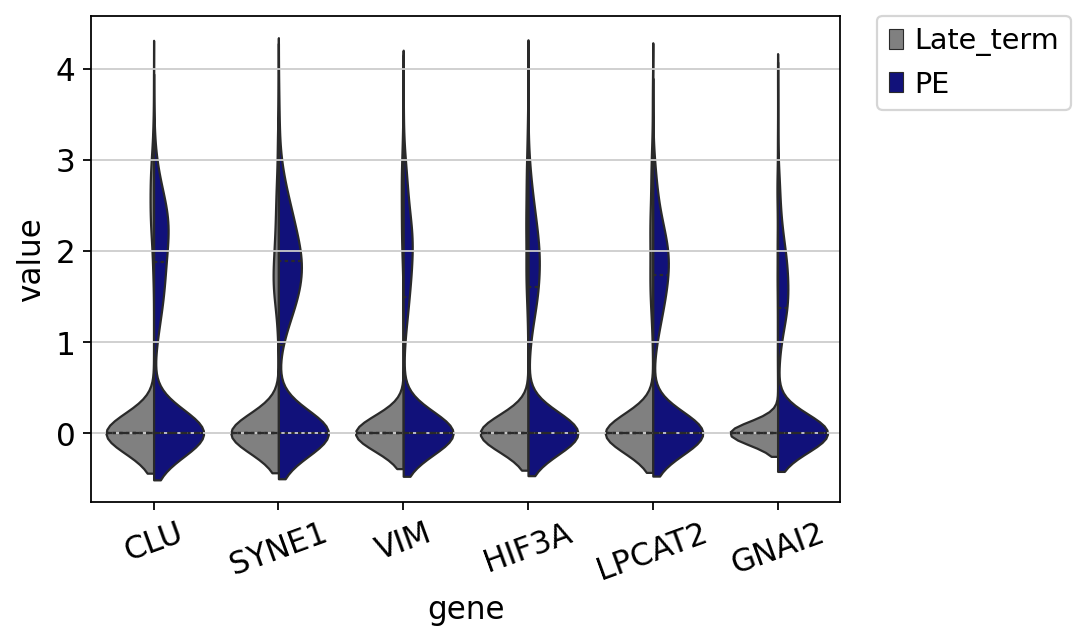

In [27]:
#Subset dVEC: 
adata_sub= ldata_norm[ldata_norm.obs['celltype_v5']== 'dVEC'] 

adata_sub = adata_sub[adata_sub.obs.condition.isin(['Late_term', 'PE'])].copy()
df = sc.get.obs_df(adata_sub, ['CLU', 'SYNE1', 'VIM', 'HIF3A', 'LPCAT2', 'GNAI2', 'condition'])
df = df.set_index('condition').stack().reset_index()
df.columns = ['condition', 'gene', 'value']


sns.violinplot(data=df, x='gene', y='value', hue= "condition",
                split=True, inner="quart", linewidth=1, scale= "count", palette= ['grey', 'darkblue']) 

plt.xticks(rotation=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("dVEC_dysregulated_v1_DEG_150622.pdf")

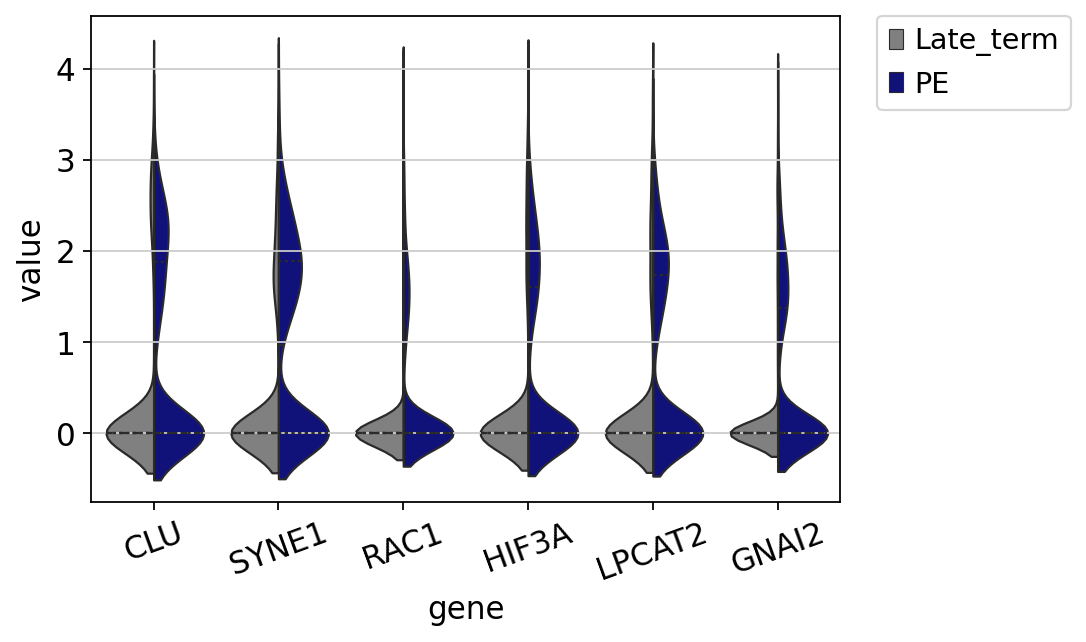

In [30]:
#Subset dVEC: used for manuscript. 
adata_sub= ldata_norm[ldata_norm.obs['celltype_v5']== 'dVEC'] 

adata_sub = adata_sub[adata_sub.obs.condition.isin(['Late_term', 'PE'])].copy()
df = sc.get.obs_df(adata_sub, ['CLU', 'SYNE1', 'RAC1', 'HIF3A', 'LPCAT2', 'GNAI2', 'condition'])
df = df.set_index('condition').stack().reset_index()
df.columns = ['condition', 'gene', 'value']


sns.violinplot(data=df, x='gene', y='value', hue= "condition",
                split=True, inner="quart", linewidth=1, scale= "count", palette= ['grey', 'darkblue']) 

plt.xticks(rotation=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("dVEC_dysregulated_v2_DEG_150622.pdf")

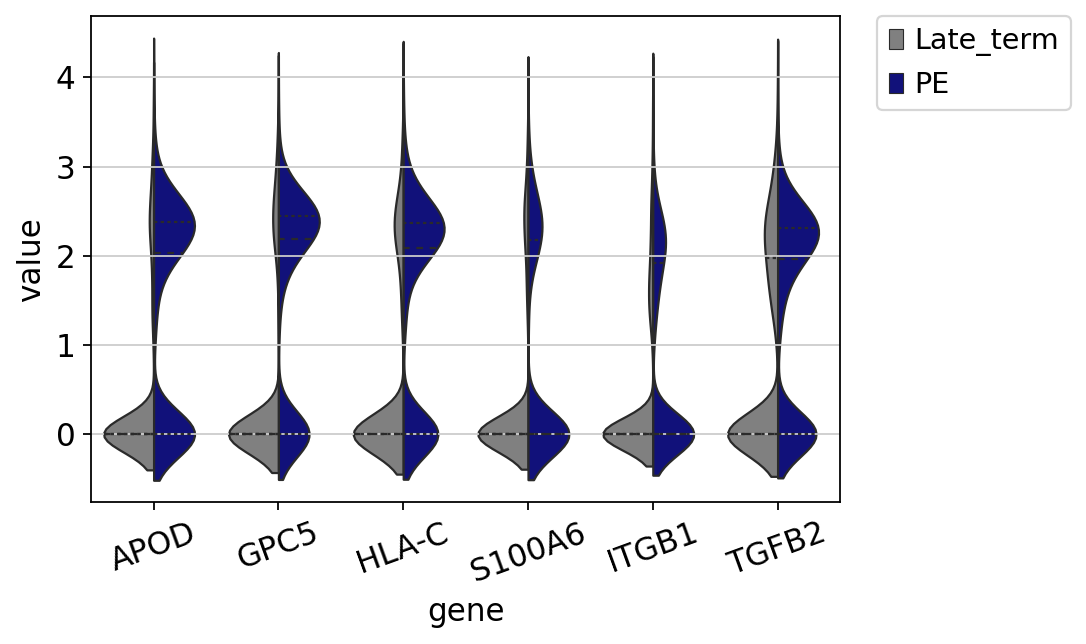

In [31]:
#Subset dLEC: 
adata_sub= ldata_norm[ldata_norm.obs['celltype_v5']== 'dLEC'] 

adata_sub = adata_sub[adata_sub.obs.condition.isin(['Late_term', 'PE'])].copy()
df = sc.get.obs_df(adata_sub, ['APOD', 'GPC5', 'HLA-C', 'S100A6', 'ITGB1', 'TGFB2', 'condition'])
df = df.set_index('condition').stack().reset_index()
df.columns = ['condition', 'gene', 'value']


sns.violinplot(data=df, x='gene', y='value', hue= "condition",
                split=True, inner="quart", linewidth=1, scale= "count", palette= ['grey', 'darkblue']) 

plt.xticks(rotation=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("dLEC_dysregulated_v1_DEG_150622.pdf")

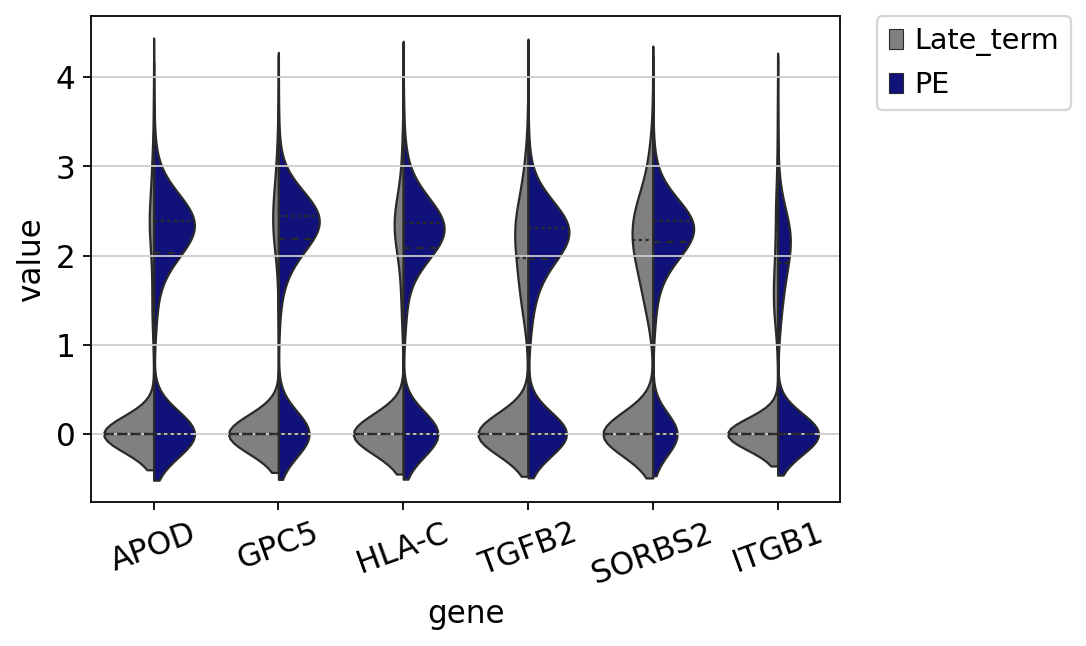

In [32]:
#Subset dLEC: 
adata_sub= ldata_norm[ldata_norm.obs['celltype_v5']== 'dLEC'] 

adata_sub = adata_sub[adata_sub.obs.condition.isin(['Late_term', 'PE'])].copy()
df = sc.get.obs_df(adata_sub, ['APOD', 'GPC5', 'HLA-C', 'TGFB2', 'SORBS2', 'ITGB1', 'condition'])
df = df.set_index('condition').stack().reset_index()
df.columns = ['condition', 'gene', 'value']


sns.violinplot(data=df, x='gene', y='value', hue= "condition",
                split=True, inner="quart", linewidth=1, scale= "count", palette= ['grey', 'darkblue']) 

plt.xticks(rotation=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("dLEC_dysregulated_v2_DEG_150622.pdf")

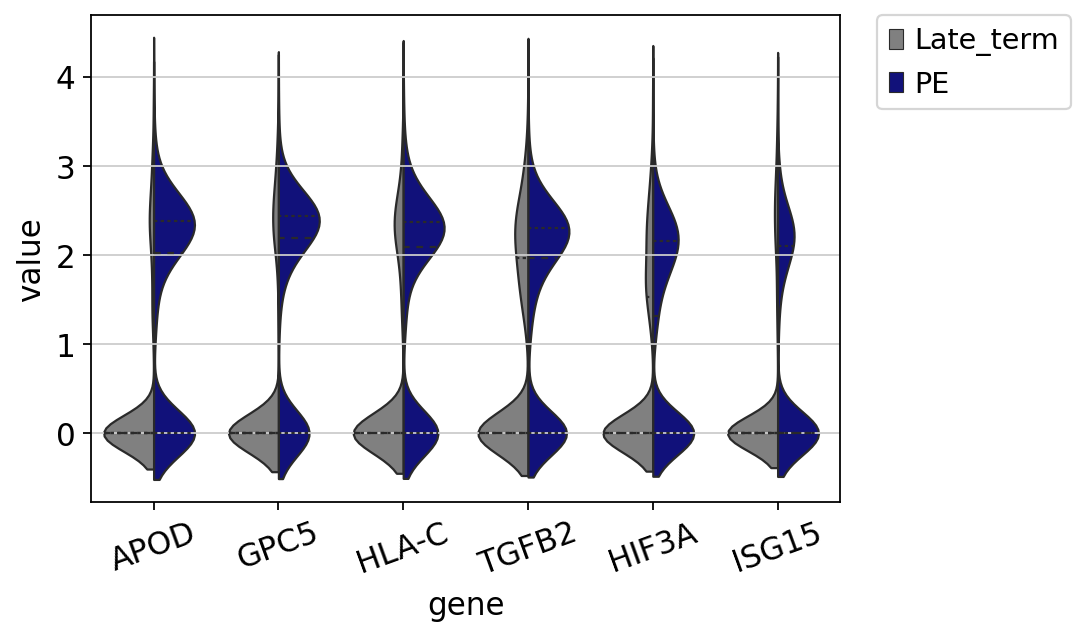

In [34]:
#dLEC: used for manuscript. 
df = sc.get.obs_df(adata_sub, ['APOD', 'GPC5', 'HLA-C', 'TGFB2', 'HIF3A', 'ISG15', 'condition'])
df = df.set_index('condition').stack().reset_index()
df.columns = ['condition', 'gene', 'value']


sns.violinplot(data=df, x='gene', y='value', hue= "condition",
                split=True, inner="quart", linewidth=1, scale= "count", palette= ['grey', 'darkblue']) 

plt.xticks(rotation=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("dLEC_dysregulated_v3_DEG_150622.pdf")

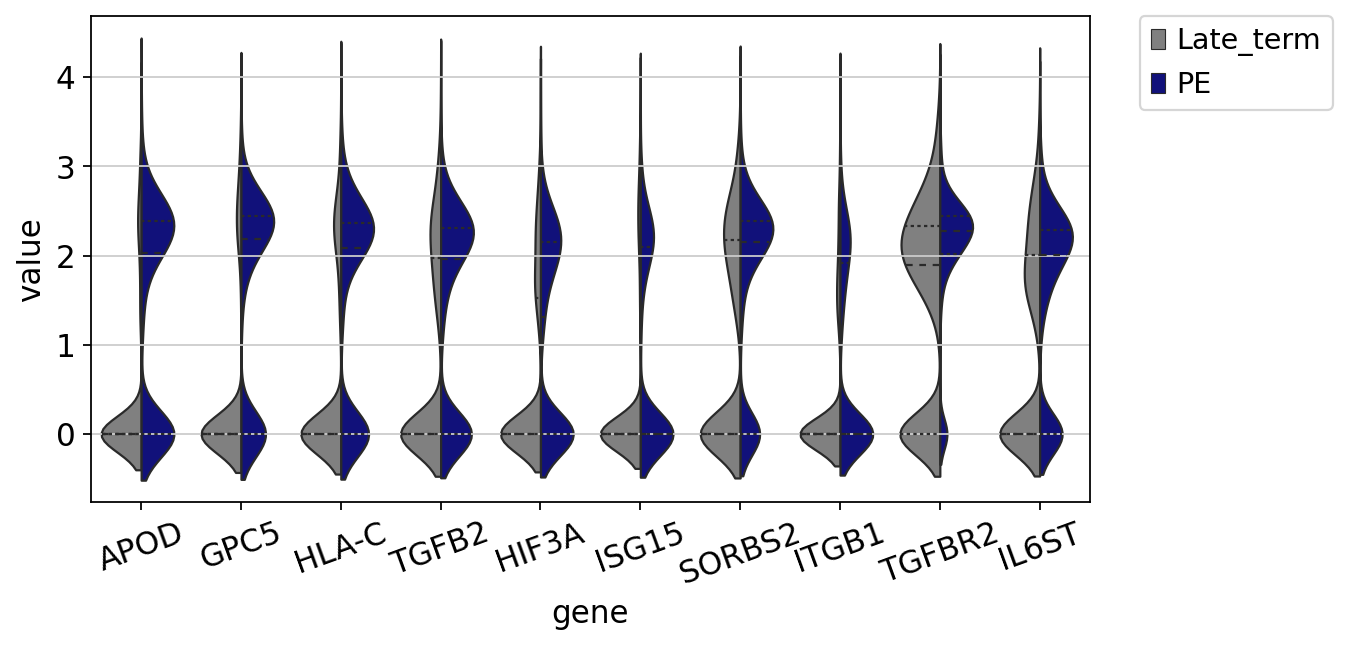

In [36]:
df = sc.get.obs_df(adata_sub, ['APOD', 'GPC5', 'HLA-C', 'TGFB2', 'HIF3A', 'ISG15', 'SORBS2', 'ITGB1', 'TGFBR2',
                               'IL6ST', 'condition'])
df = df.set_index('condition').stack().reset_index()
df.columns = ['condition', 'gene', 'value']


plt.rcParams["figure.figsize"] = (8,4)
sns.violinplot(data=df, x='gene', y='value', hue= "condition",
                split=True, inner="quart", linewidth=1, scale= "count", palette= ['grey', 'darkblue']) 

plt.xticks(rotation=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("dLEC_dysregulated_v4_extended_DEG_150622.pdf")

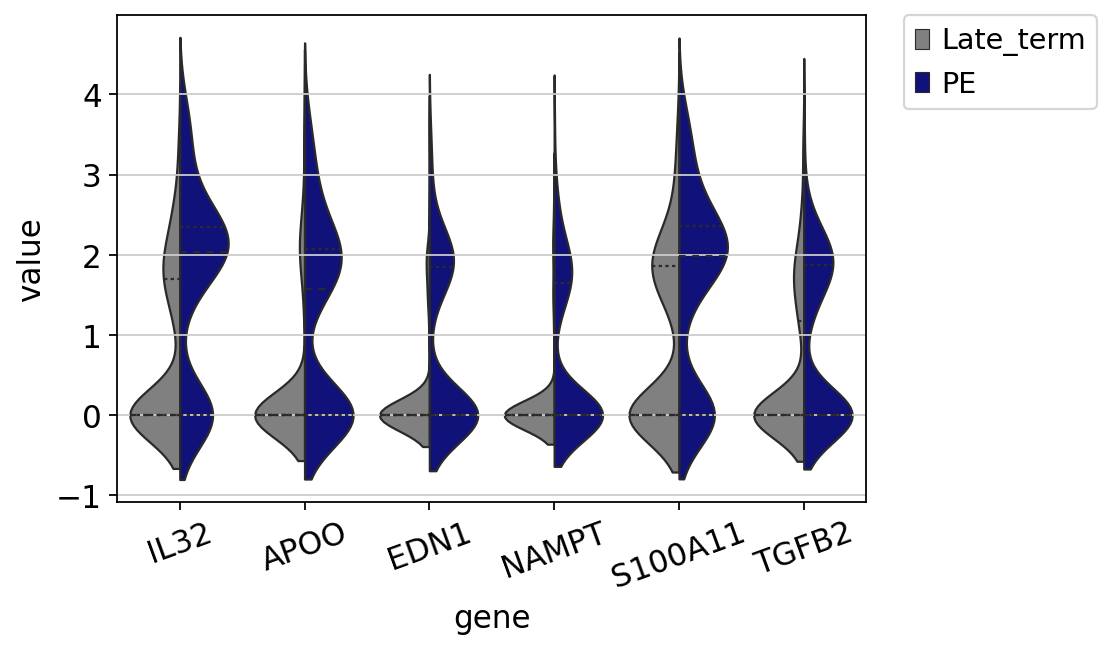

In [37]:
adata_sub= ldata_norm[ldata_norm.obs['celltype_v5']== 'dLECp'] 

adata_sub = adata_sub[adata_sub.obs.condition.isin(['Late_term', 'PE'])].copy()

df = sc.get.obs_df(adata_sub, ['IL32', 'APOO', 'EDN1', 'NAMPT', 'S100A11', 'TGFB2', 'condition'])
df = df.set_index('condition').stack().reset_index()
df.columns = ['condition', 'gene', 'value']


plt.rcParams["figure.figsize"] = (6,4)
sns.violinplot(data=df, x='gene', y='value', hue= "condition",
                split=True, inner="quart", linewidth=1, scale= "count", palette= ['grey', 'darkblue']) 

plt.xticks(rotation=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("dLECp_dysregulated_DEG_150622.pdf")

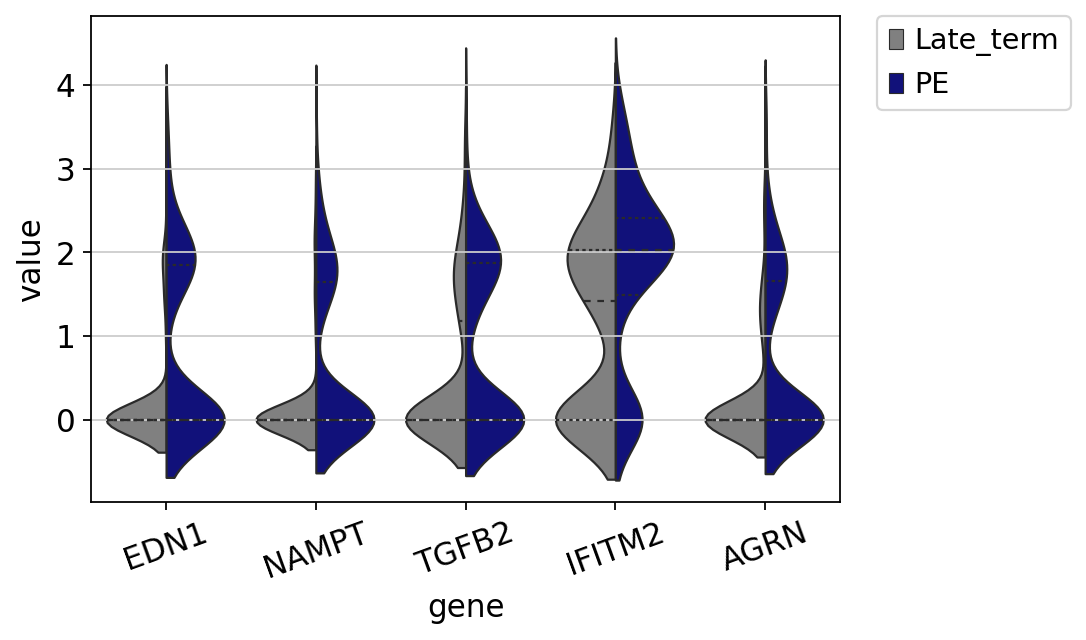

In [43]:
#dLECP: used for manuscript. 
df = sc.get.obs_df(adata_sub, ['EDN1', 'NAMPT',  'TGFB2', 'IFITM2', 'AGRN', 
                               'condition'])
df = df.set_index('condition').stack().reset_index()
df.columns = ['condition', 'gene', 'value']


plt.rcParams["figure.figsize"] = (6,4)
sns.violinplot(data=df, x='gene', y='value', hue= "condition",
                split=True, inner="quart", linewidth=1, scale= "count", palette= ['grey', 'darkblue']) 

plt.xticks(rotation=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("dLECp_dysregulated_DEG_v2_150622.pdf")